In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [7]:
training_sentences[0], training_labels[0]

('b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."',
 0)

In [8]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [9]:
# training_labels.count(0)

from collections import Counter
Counter(training_labels)

Counter({0: 12500, 1: 12500})

In [10]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [11]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [12]:
# !pip install keras_preprocessing

In [13]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [14]:
len(word_index)

86538

In [15]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [16]:
padded.shape, testing_padded.shape

((25000, 120), (25000, 120))

In [17]:
sequences[0]

[58,
 11,
 13,
 34,
 438,
 399,
 17,
 173,
 28,
 8,
 32,
 1377,
 3400,
 41,
 495,
 196,
 24,
 87,
 155,
 18,
 11,
 210,
 339,
 28,
 69,
 247,
 212,
 8,
 485,
 61,
 69,
 87,
 115,
 98,
 23,
 5739,
 11,
 3316,
 656,
 776,
 11,
 17,
 6,
 34,
 405,
 8227,
 177,
 2476,
 425,
 1,
 91,
 1252,
 139,
 71,
 148,
 54,
 1,
 7524,
 71,
 228,
 69,
 2961,
 15,
 2879,
 1505,
 4997,
 2,
 39,
 3946,
 118,
 1607,
 16,
 3400,
 13,
 162,
 18,
 3,
 1252,
 926,
 7985,
 8,
 3,
 17,
 12,
 13,
 4199,
 4,
 101,
 147,
 1236,
 10,
 239,
 691,
 12,
 43,
 24,
 100,
 38,
 11,
 7231,
 38,
 1377,
 51,
 408,
 10,
 98,
 1213,
 873,
 144,
 9]

In [18]:
padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   58,
         11,   13,   34,  438,  399,   17,  173,   28,    8,   32, 1377,
       3400,   41,  495,  196,   24,   87,  155,   18,   11,  210,  339,
         28,   69,  247,  212,    8,  485,   61,   69,   87,  115,   98,
         23, 5739,   11, 3316,  656,  776,   11,   17,    6,   34,  405,
       8227,  177, 2476,  425,    1,   91, 1252,  139,   71,  148,   54,
          1, 7524,   71,  228,   69, 2961,   15, 2879, 1505, 4997,    2,
         39, 3946,  118, 1607,   16, 3400,   13,  162,   18,    3, 1252,
        926, 7985,    8,    3,   17,   12,   13, 4199,    4,  101,  147,
       1236,   10,  239,  691,   12,   43,   24,  100,   38,   11, 7231,
         38, 1377,   51,  408,   10,   98, 1213,  873,  144,    9],
      dtype=int32)

## Building the Simple RNN Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
   filepath='models/', 
   monitor='val_loss', 
   save_best_only=True, 
   mode='min'
)

history = model_rnn.fit(padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
782/782 - 39s - loss: 0.6926 - accuracy: 0.5207 - val_loss: 0.6778 - val_accuracy: 0.5933 - 39s/epoch - 50ms/step
Epoch 2/30
782/782 - 37s - loss: 0.5335 - accuracy: 0.7368 - val_loss: 0.4222 - val_accuracy: 0.8171 - 37s/epoch - 47ms/step
Epoch 3/30
782/782 - 37s - loss: 0.3885 - accuracy: 0.8334 - val_loss: 0.5061 - val_accuracy: 0.7536 - 37s/epoch - 47ms/step
Epoch 4/30
782/782 - 37s - loss: 0.2783 - accuracy: 0.8922 - val_loss: 0.5079 - val_accuracy: 0.7831 - 37s/epoch - 47ms/step
Epoch 5/30
782/782 - 37s - loss: 0.1690 - accuracy: 0.9395 - val_loss: 0.5701 - val_accuracy: 0.8173 - 37s/epoch - 47ms/step
Epoch 6/30
782/782 - 35s - loss: 0.1093 - accuracy: 0.9610 - val_loss: 0.7035 - val_accuracy: 0.8012 - 35s/epoch - 45ms/step
Epoch 7/30
782/782 - 37s - loss: 0.0585 - accuracy: 0.9797 - val_loss: 0.8924 - val_accuracy: 0.7886 - 37s/epoch - 47ms/step
Epoch 8/30
782/782 - 36s - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.9597 - val_accuracy: 0.7840 - 36s/epoch - 46ms/step


In [26]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.692623,0.52068,0.677822,0.59332
1,0.533492,0.73680,0.422179,0.81708
2,0.388538,0.83344,0.506103,0.75356
3,0.278290,0.89224,0.507880,0.78312
4,0.168991,0.93952,0.570139,0.81728


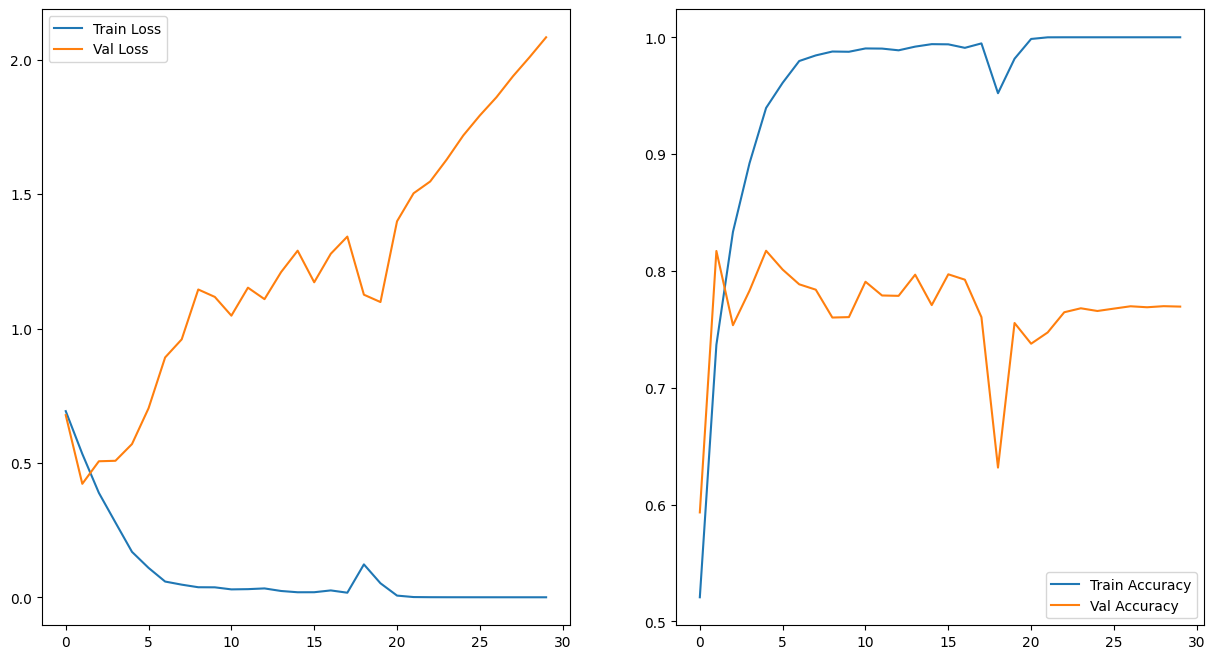

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))

fig.add_subplot(1,2,1)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Val Loss')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

## Building the GRU Model

In [22]:
from keras.layers import Bidirectional, GRU

model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                9600      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history_gru = model_gru.fit(padded, training_labels, epochs=3, verbose=2, 
                            validation_data=(testing_padded, testing_labels))

Epoch 1/3
782/782 - 79s - loss: 0.4947 - accuracy: 0.7407 - val_loss: 0.3497 - val_accuracy: 0.8482 - 79s/epoch - 102ms/step
Epoch 2/3
782/782 - 70s - loss: 0.2928 - accuracy: 0.8832 - val_loss: 0.3513 - val_accuracy: 0.8459 - 70s/epoch - 90ms/step
Epoch 3/3
782/782 - 74s - loss: 0.2226 - accuracy: 0.9179 - val_loss: 0.3860 - val_accuracy: 0.8421 - 74s/epoch - 95ms/step


In [35]:
history_gru_df = pd.DataFrame(history_gru.history)
history_gru_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494712,0.74072,0.349734,0.84816
1,0.292833,0.88324,0.351350,0.84592
2,0.222560,0.91792,0.385984,0.84208


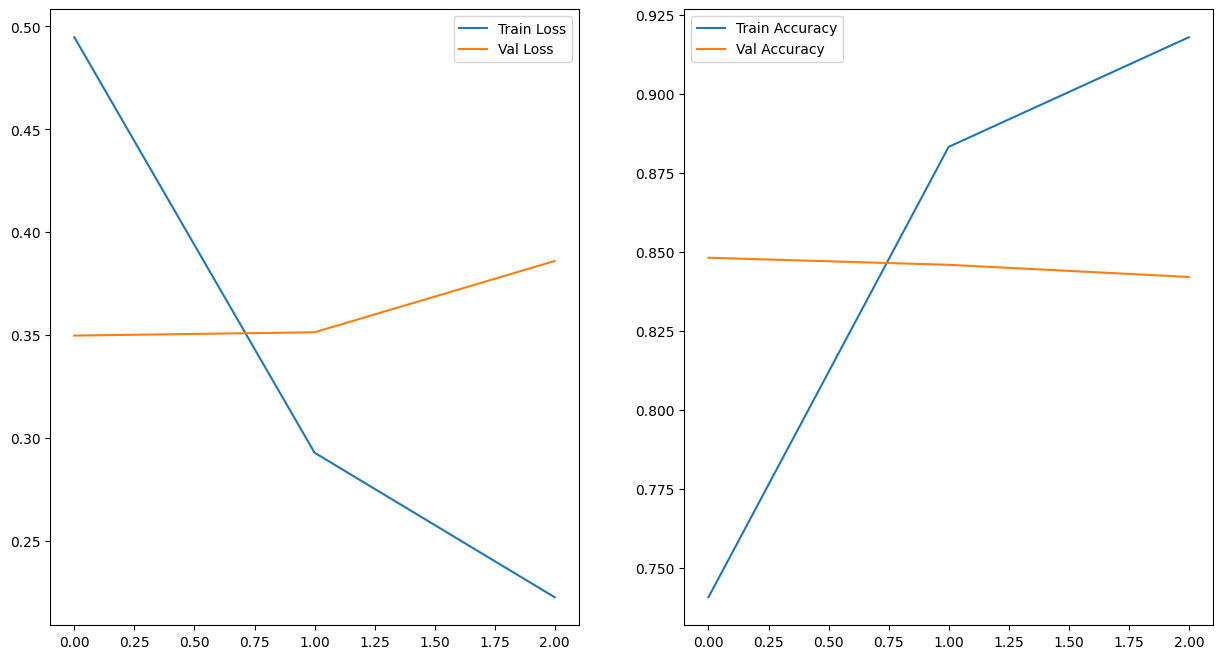

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))

fig.add_subplot(1,2,1)
plt.plot(history_gru_df['loss'], label='Train Loss')
plt.plot(history_gru_df['val_loss'], label='Val Loss')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(history_gru_df['accuracy'], label='Train Accuracy')
plt.plot(history_gru_df['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

## Building the LSTM Model

In [32]:
from keras.layers import Bidirectional, LSTM

model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history_lstm = model_lstm.fit(padded, training_labels, epochs=5, verbose=2,
                              validation_data=(testing_padded, testing_labels))

Epoch 1/5
782/782 - 66s - loss: 0.4472 - accuracy: 0.7831 - val_loss: 0.3435 - val_accuracy: 0.8512 - 66s/epoch - 84ms/step
Epoch 2/5
782/782 - 64s - loss: 0.2790 - accuracy: 0.8876 - val_loss: 0.3532 - val_accuracy: 0.8476 - 64s/epoch - 81ms/step
Epoch 3/5
782/782 - 64s - loss: 0.2130 - accuracy: 0.9196 - val_loss: 0.4101 - val_accuracy: 0.8377 - 64s/epoch - 82ms/step
Epoch 4/5
782/782 - 64s - loss: 0.1614 - accuracy: 0.9406 - val_loss: 0.4778 - val_accuracy: 0.8315 - 64s/epoch - 82ms/step
Epoch 5/5
782/782 - 63s - loss: 0.1171 - accuracy: 0.9587 - val_loss: 0.5223 - val_accuracy: 0.8320 - 63s/epoch - 80ms/step


In [56]:
history_lstm_df = pd.DataFrame(history_lstm.history)
history_lstm_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.447220,0.78312,0.343525,0.85120
1,0.278992,0.88756,0.353210,0.84764
2,0.213023,0.91956,0.410142,0.83768
3,0.161394,0.94056,0.477828,0.83152
4,0.117061,0.95868,0.522331,0.83200


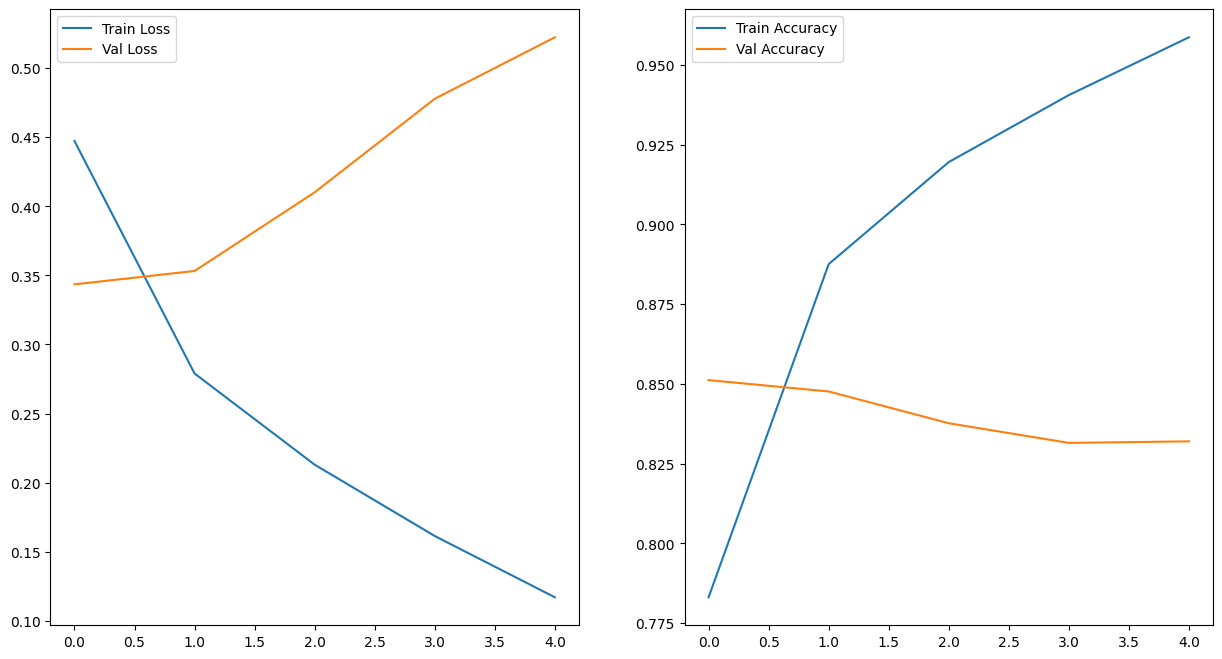

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))

fig.add_subplot(1,2,1)
plt.plot(history_lstm_df['loss'], label='Train Loss')
plt.plot(history_lstm_df['val_loss'], label='Val Loss')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(history_lstm_df['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_df['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

## Inferencing

In [38]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie. Worst movie ever.'

In [46]:
type(tokenizer)

keras.src.preprocessing.text.Tokenizer

In [49]:
def predict_review(model, review, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequences, maxlen=max_length)
    yhat = model.predict(padded, verbose=0)
    return yhat

predict_review(model=model_gru, review=text2, tokenizer=tokenizer, max_length=max_length)

array([[0.02403416]], dtype=float32)